Highest mean score for Bipedal Walker : 319.67926
Lowest mean score for Bipedal Walker : -178.50919
Distance between min and max mean score for Bipedal Walker : 498.18845
Highest mean score for Mountain Car Continuous : -0.00024594
Lowest mean score for Mountain Car Continuous : -99.89905
Distance between min and max mean score for Mountain Car Continuous : 99.89880406
Highest mean score for Lunar Lander : 186.84024
Lowest mean score for Lunar Lander : -574.57825
Distance between min and max mean score for Lunar Lander : 761.41849
Highest mean score for Cart Pole : 500.0
Lowest mean score for Cart Pole : 9.8
Distance between min and max mean score for Cart Pole : 490.2
Highest mean score for Mountain Car : -115.2
Lowest mean score for Mountain Car : -200.0
Distance between min and max mean score for Mountain Car : 84.8
Highest mean score for Car Racing : -26.558294
Lowest mean score for Car Racing : -93.623215
Distance between min and max mean score for Car Racing : 67.064921
Highest m

/tmp/ipykernel_6716/902874849.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(environments, rotation=45, ha='right')


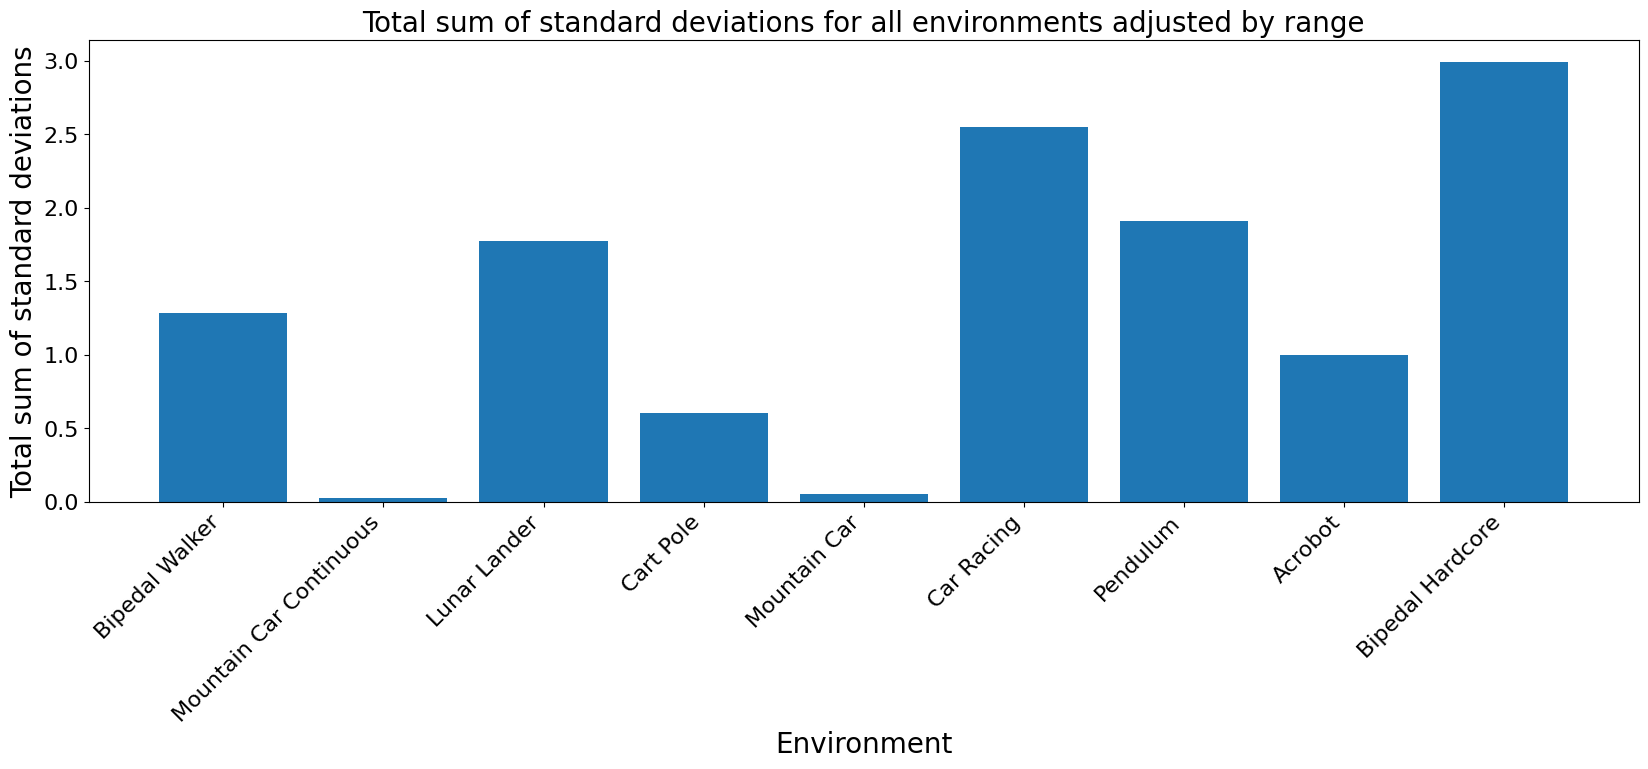

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

environments = ["Bipedal Walker", "Mountain Car Continuous", "Lunar Lander", "Cart Pole", "Mountain Car", "Car Racing", "Pendulum", "Acrobot", "Bipedal Hardcore"]

df = pd.read_csv("ALL DATA.csv")

distances = []
for env in environments:
    env_data = df[df["Environment"] == env]
    highest_mean_score = env_data["Mean Score"].max()
    lowest_mean_score = env_data["Mean Score"].min()
    distance = highest_mean_score - lowest_mean_score
    distances.append(distance)
    print("Highest mean score for", env, ":", highest_mean_score)
    print("Lowest mean score for", env, ":", lowest_mean_score)
    print("Distance between min and max mean score for", env, ":", distance)

total_sums = []
for env, distance in zip(environments, distances):
    df = pd.read_csv("ALL DATA.csv")
    env_data = df[df["Environment"] == env]
    ppo_sum = env_data[env_data["Algorithm Name"] == "PPO"]["Standard Deviation"].sum()
    td3_sum = env_data[env_data["Algorithm Name"] == "TD3"]["Standard Deviation"].sum()
    ddpg_sum = env_data[env_data["Algorithm Name"] == "DDPG"]["Standard Deviation"].sum()
    a2c_sum = env_data[env_data["Algorithm Name"] == "A2C"]["Standard Deviation"].sum()
    sac_sum = env_data[env_data["Algorithm Name"] == "SAC"]["Standard Deviation"].sum()
    dqn_sum = env_data[env_data["Algorithm Name"] == "DQN"]["Standard Deviation"].sum()
    labels = ["PPO", "TD3", "DDPG", "A2C", "SAC", "DQN"]
    scores = [ppo_sum, td3_sum, ddpg_sum, a2c_sum, sac_sum, dqn_sum]
    print("Sum of standard deviations for PPO in", env, ":", ppo_sum)
    print("Sum of standard deviations for TD3 in", env, ":", td3_sum)
    print("Sum of standard deviations for DDPG in", env, ":", ddpg_sum)
    print("Sum of standard deviations for A2C in", env, ":", a2c_sum)
    print("Sum of standard deviations for SAC in", env, ":", sac_sum)
    print("Sum of standard deviations for DQN in", env, ":", dqn_sum)
    total_sum = ppo_sum + td3_sum + ddpg_sum + a2c_sum + sac_sum + dqn_sum
    print("Total sum =", total_sum)
    total_sums.append(total_sum / distance) 

fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(environments, total_sums)
ax.set_title("Total sum of standard deviations for all environments adjusted by range", fontsize = 20)
ax.set_xlabel("Environment", fontsize = 20)
ax.set_ylabel("Total sum of standard deviations", fontsize = 20)

ax.tick_params(axis='x', labelsize=14) 
ax.set_xticklabels(environments, rotation=45, ha='right')

plt.tick_params(axis='both', which='major', labelsize=16)

plt.savefig("Total sum of standard deviations for all environments adjusted by range_BETTERFONTSIZES.png")

plt.show()